參考資料1：https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheMergeSort.html
參考資料2:https://www.youtube.com/watch?v=3aTfQvs-_hA

初步想法

1.應該先考慮array的個數
很直覺的，if len(list) <＝ 1，也就等於不用排序，return

2.將數列切割到『以一個數字』為單位

3.兩兩比較，由小到大排序，此時『以兩個數字』為單位

4.將左邊的數字 = list1，右邊的數字 = list2，同時建立list3(可放置比較後的結果)

我的問題是：
一旦array變大，我怎麼知道左邊放幾個數字，右邊又要放幾個數字？
所以我就想說，應該要先數輸入的array有幾個數字，然後把它分一半
➡️middle = len(list) /2

然後我就查了一下要怎麼表達，從開始到middle ＆ middle到最後
➡️:middle & middle:

list1,list2 = list[:middle], list[middle:]

5.當我的index = len，代表比較結束，所以用while設定條件

if list1[index0] < list2[index0]:
list3.append(list1[index0])

取出較小的數字後，list1 會往index1的後面繼續比較
list1[index0] ++

如果上面不符合，就等於 list1[index0] > list2[index0]
else:
list3.append(list2[index0])

取出較小的數字後，array2 會往index1的後面繼續比較
list2[index0] ++

我的問題是：
現在把“middle前”和“middle後”的數整理完畢，要怎麼再把整個合併？
我知道合併的步驟跟上方比較是一樣的，可是要再多加一個list放入新資料嗎？還是list of list
所以我就查了一下“怎麼讓兩個list變成一個list”
 ➡️result.extend

result.extend(list1[index0:])
result.extend(list2[index0:])
return result

In [2]:
class Solution(object):
    def merge_sort(self,list):
        if len(list) <= 1:
            return list


In [3]:
if len(list) > 1:
middle = len(list) //2
left,right = list[:middle], list[middle:]
Solution().merge_sort(left)
Solution().merge_sort(right)


IndentationError: expected an indented block (<ipython-input-3-8b853d87a1df>, line 2)

我發現error是因為還沒給list，所以不知道怎麼切割資料
我重新了定義merge_sort

In [4]:
class Solution(object):
    def merge_sort(self,list):
        if len(list) <= 1:
            return list
        if len(list) > 1:
            middle = len(list) //2
            lleft,right = list[:middle], list[middle:] 
            Solution().merge_sort(left)
            Solution().merge_sort(right)


In [6]:
left_pointer =  0
right_pointer = 0
result = []
#左右都從index = 0開始比較，index不可能比len(left)多
while left_pointer < len(left) and right_pointer <len(right):
        if left(left_pointer) < right(right_pointer):
            result.append(left[left_pointer])
            left_pointer += 1
        else:
             result.append(right[right_pointer])
            right_pointer += 1
    result.extend(list1[left_pointer:])
    result.extend(list2[right_pointer:])
    
    return result

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

問題應該不在於"right_pointer += 1"
"unindent does not match any outer indentation level"，這是對齊的問題，所以我對齊後重新run

In [13]:
left_pointer =  0
right_pointer = 0
result = []
#左右都從index = 0開始比較，index不可能比len(left)多
while left_pointer < len(left) and right_pointer <len(right):
    if left(left_pointer) < right(right_pointer):
        result.append(left[left_pointer])
        left_pointer += 1
    else:
        result.append(right[right_pointer])
        right_pointer += 1
            
        result.extend(left[left_pointer:])
        result.extend(right[right_pointer:])

        return result
                

SyntaxError: 'return' outside function (<ipython-input-13-be95f0d6c8e2>, line 16)

我原本想用新的list將比較後的資料放入，但是我還沒找到哪裡錯
同學建議我，直接用排序好的資料取代原本的list，這樣也可以少掉新的arr要新增append，同時舊的arr要刪除pop


In [15]:
class Solution(object):
    def merge_sort(self,list):
        if len(list) > 1:
            middle = len(list) //2
            left = list[:middle]
            right=list[middle:] 
            Solution().merge_sort(left)
            Solution().merge_sort(right)
            
            left_pointer = 0
            right_pointer = 0
            index = 0
            #左右都從index = 0開始比較，index不可能比len(left)多
            while left_pointer < len(left) and right_pointer <len(right):
                if left[left_pointer] < right[right_pointer]:
                    list[index] = left[left_pointer]
                    left_pointer += 1
                else:
                    list[index] = right[right_pointer]
                    right_pointer += 1
                index += 1
            while left_pointer < len(left):
                list[index] = left[left_pointer]
                left_pointer += 1
                index += 1
            while right_pointer < len(right):
                list[index] = right[right_pointer]
                right_pointer += 1
                index += 1
                return list

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 26)

我查了一下"unindent does not match any outer indentation level"，是縮排錯，重新整理

最後執行結果

In [17]:
class Solution(object):
    def mergesort(self, list):
         if len(list) <= 1:
            return list
         if len(list) > 1:
            middle = len(list) // 2
            left = list[:middle]
            right = list[middle:]
            Solution().mergesort(left)
            Solution().mergesort(right)
            
            left_point = 0
            right_point = 0
            index = 0
            while left_point < len(left) and right_point < len(right):
                if left[left_point] < right[right_point]:
                    list[index] = left[left_point]
                    left_point += 1
                else:
                    list[index] = right[right_point]
                    right_point += 1
                index += 1
            while left_point < len(left):
                list[index] = left[left_point]
                left_point += 1
                index += 1
            while right_point < len(right):
                list[index] = right[right_point]
                right_point += 1
                index += 1
            return list



In [18]:
list = [3,6,9,11,43,2,1]
Solution().mergesort(list)
list

[1, 2, 3, 6, 9, 11, 43]

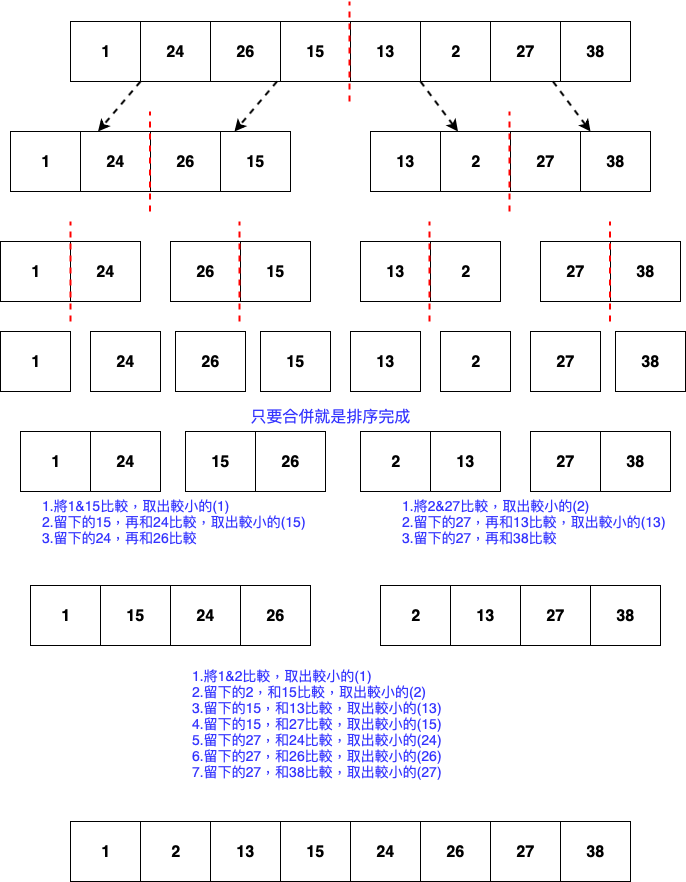

In [19]:
from IPython.display import Image
Image(filename="/Users/maggie/Downloads/merge_sort.png")